In [1]:
import numpy as np
import pandas as pd 
import math
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('classic')
plt.style.use('seaborn')

In [3]:
products = [
    "ind_ahor_fin_ult1",
    "ind_aval_fin_ult1",
    "ind_cco_fin_ult1" ,
    "ind_cder_fin_ult1",
    "ind_cno_fin_ult1" ,
    "ind_ctju_fin_ult1",
    "ind_ctma_fin_ult1",
    "ind_ctop_fin_ult1",
    "ind_ctpp_fin_ult1",
    "ind_deco_fin_ult1",
    "ind_deme_fin_ult1",
    "ind_dela_fin_ult1",
    "ind_ecue_fin_ult1",
    "ind_fond_fin_ult1",
    "ind_hip_fin_ult1" ,
    "ind_plan_fin_ult1",
    "ind_pres_fin_ult1",
    "ind_reca_fin_ult1",
    "ind_tjcr_fin_ult1",
    "ind_valo_fin_ult1",
    "ind_viv_fin_ult1" ,
    "ind_nomina_ult1"  ,
    "ind_nom_pens_ult1",
    "ind_recibo_ult1"  ,
]

In [4]:
# limit_rows   = 7000000
df           = pd.read_csv("../data/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str})
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 1.2e4
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

/Users/patorn/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/patorn/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/core/generic.py:2644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.713420e+05,170991.000000,170991.0,170148.000000,170991.000000,1.357810e+05,171342.000000,171342.0,171342.000000,171342.000000,...,171342.000000,171342.000000,171342.000000,171342.000000,171342.000000,171342.000000,171342.000000,171128.000000,171128.000000,171342.000000
mean,8.378699e+05,1.177670,1.0,26.377742,0.460246,1.367689e+05,0.000023,0.0,0.650763,0.000852,...,0.005492,0.010173,0.002708,0.050735,0.045861,0.024909,0.003957,0.057524,0.062047,0.129571
std,4.312377e+05,4.168958,0.0,12.798282,0.498419,1.732465e+05,0.004832,0.0,0.476730,0.029178,...,0.073904,0.100345,0.051968,0.219456,0.209185,0.155849,0.062780,0.232842,0.241242,0.335832
min,1.611500e+04,1.000000,1.0,1.000000,0.000000,7.225620e+03,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.520200e+05,1.000000,1.0,15.000000,0.000000,6.959181e+04,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.338380e+05,1.000000,1.0,28.000000,0.000000,1.034393e+05,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204744e+06,1.000000,1.0,33.000000,1.000000,1.594002e+05,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.553513e+06,99.000000,1.0,52.000000,1.000000,9.659264e+06,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
len(df)

171342

In [6]:
df.describe()

,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.713420e+05,170991.000000,170991.0,170148.000000,170991.000000,1.357810e+05,171342.000000,171342.0,171342.000000,171342.000000,...,171342.000000,171342.000000,171342.000000,171342.000000,171342.000000,171342.000000,171342.000000,171128.000000,171128.000000,171342.000000
mean,8.378699e+05,1.177670,1.0,26.377742,0.460246,1.367689e+05,0.000023,0.0,0.650763,0.000852,...,0.005492,0.010173,0.002708,0.050735,0.045861,0.024909,0.003957,0.057524,0.062047,0.129571
std,4.312377e+05,4.168958,0.0,12.798282,0.498419,1.732465e+05,0.004832,0.0,0.476730,0.029178,...,0.073904,0.100345,0.051968,0.219456,0.209185,0.155849,0.062780,0.232842,0.241242,0.335832
min,1.611500e+04,1.000000,1.0,1.000000,0.000000,7.225620e+03,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.520200e+05,1.000000,1.0,15.000000,0.000000,6.959181e+04,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.338380e+05,1.000000,1.0,28.000000,0.000000,1.034393e+05,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204744e+06,1.000000,1.0,33.000000,1.000000,1.594002e+05,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.553513e+06,99.000000,1.0,52.000000,1.000000,9.659264e+06,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["year"] = pd.DatetimeIndex(df["fecha_dato"]).year
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

In [9]:
pd.unique(df["month"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

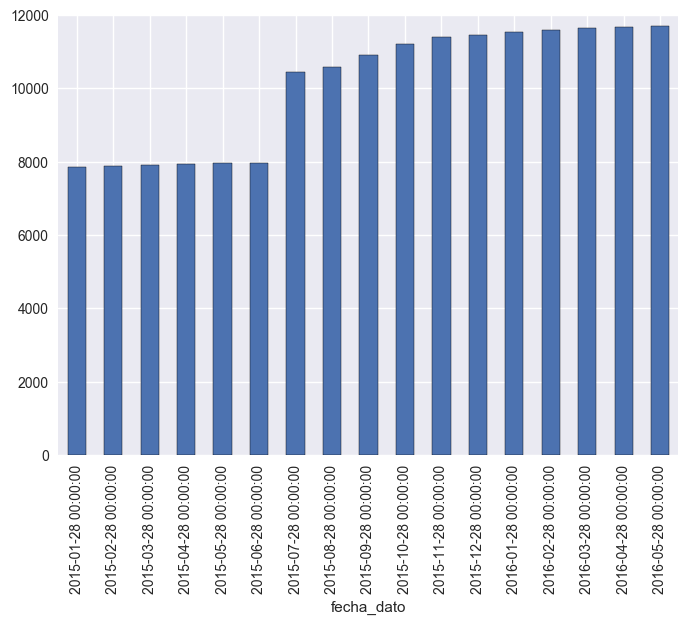

In [11]:
month = df.groupby(['fecha_dato'])['fecha_dato'].count()
month.plot('bar')

In [12]:
df['fecha_alta_month_year'] = df['fecha_alta'].map(lambda x: 1000*x.year + x.month)

In [13]:
join_month = df.groupby(['fecha_alta_month_year'])

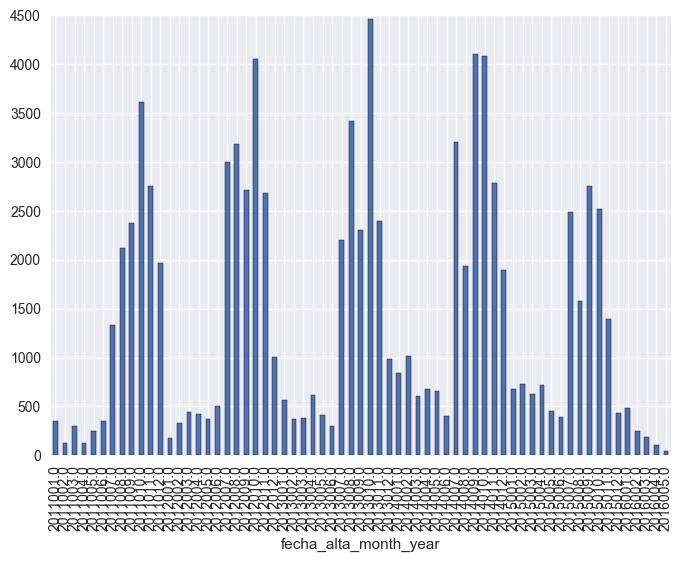

In [14]:
join_month['fecha_dato'].count().loc[2011001:].plot('bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1989428d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14ea1b358>]], dtype=object)

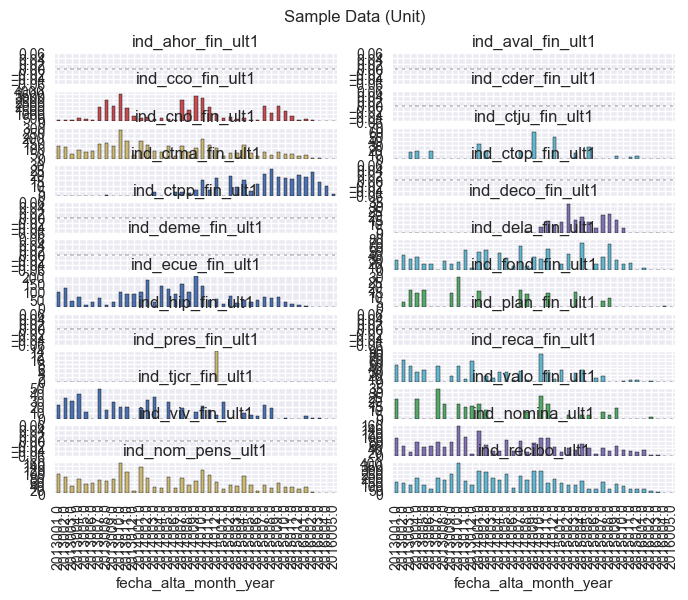

In [15]:
join_month[products].sum().loc[2013001:].plot(kind='bar', 
                                              subplots=True, 
                                              grid=True, 
                                              title="Sample Data (Unit)", 
                                              sharex=True, 
                                              sharey=False, 
                                              legend=False,  
                                              layout=(12, 2))

# Group by Age

In [16]:
df["age"].describe()

count    171361.000000
mean         40.190954
std          17.278888
min           2.000000
25%          24.000000
50%          39.000000
75%          51.000000
max         164.000000
Name: age, dtype: float64

In [17]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"]                  = df["age"].astype(int)

(15, 100)

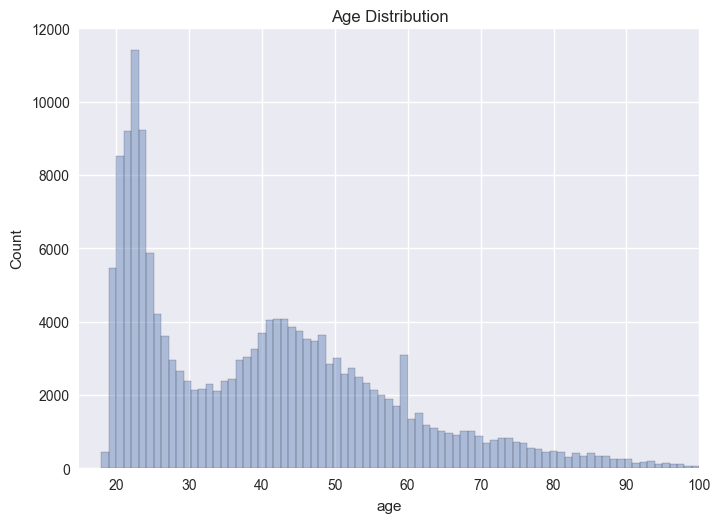

In [18]:
sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False)
sns.plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlim((15,100))

In [19]:
age_group = df.groupby('age')

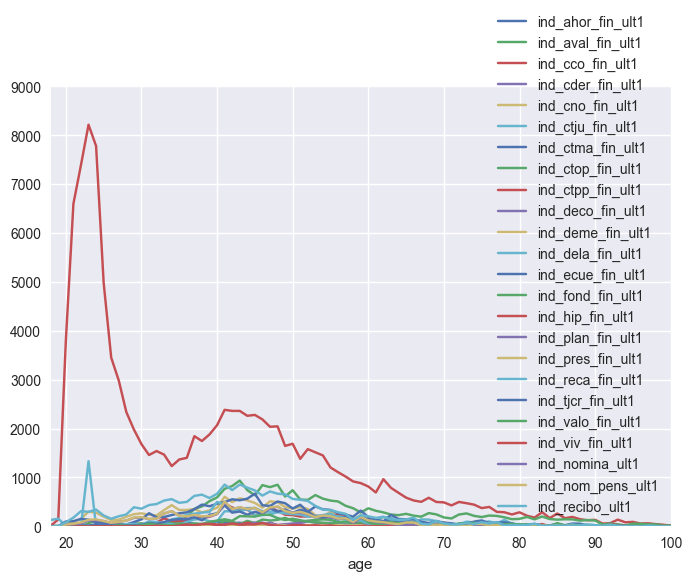

In [20]:
age_group[products].sum().plot()

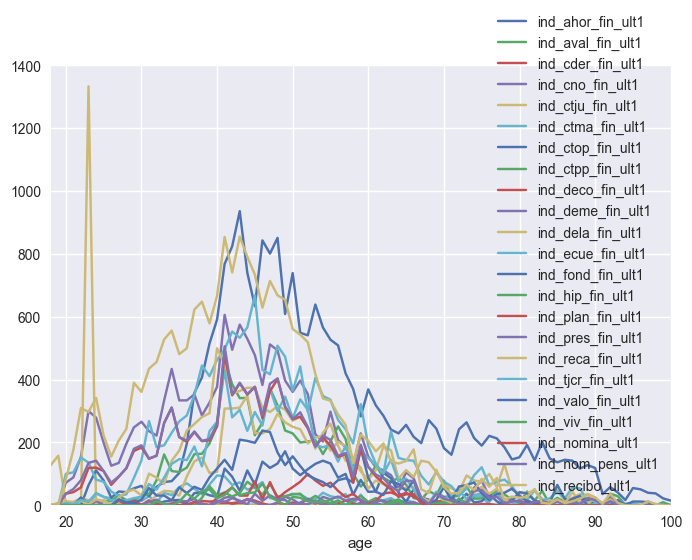

In [21]:
age_group[[product for product in products if product != 'ind_cco_fin_ult1']].sum().plot()

# Group by antiguedad

In [22]:
df["antiguedad"].describe()

count     171685
unique       498
top           12
freq        1697
Name: antiguedad, dtype: int64

In [23]:
antiguedad_group = df.groupby('antiguedad')

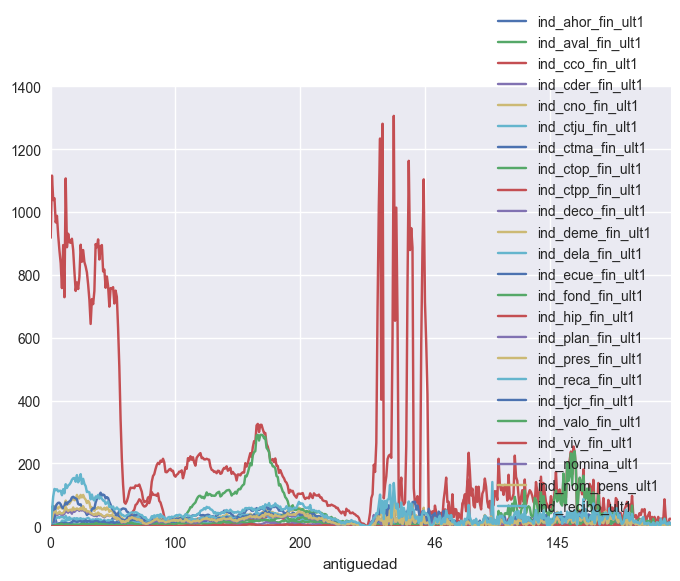

In [24]:
antiguedad_group[products].sum().plot()

# Group by cod_prov

In [25]:
df["cod_prov"].describe()

count    170566.000000
mean         26.481180
std          12.747542
min           1.000000
25%          15.000000
50%          28.000000
75%          34.000000
max          52.000000
Name: cod_prov, dtype: float64

In [26]:
cod_prov_group = df.groupby('cod_prov')

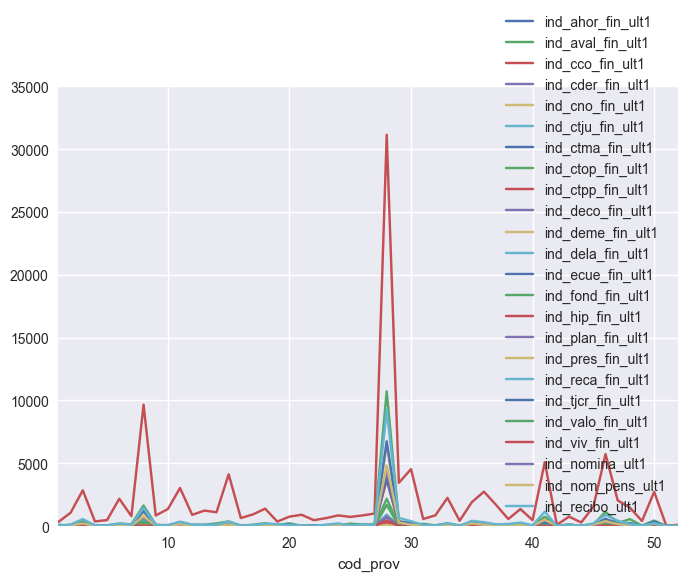

In [27]:
cod_prov_group[products].sum().plot()